In [345]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [346]:
df1=pd.read_csv('dpe1.csv')


C:\Users\marie\AppData\Local\Temp\ipykernel_20688\1942843383.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('dpe1.csv')


In [347]:
df1.head()

,id,numero_dpe,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,nom_methode_dpe,version_methode_dpe,nom_methode_etude_thermique,version_methode_etude_thermique,date_visite_diagnostiqueur,...,tv017_zone_hiver_code,tv017_zone_hiver_t_ext_moyen,tv017_zone_hiver_peta_cw,tv017_zone_hiver_dh14,tv017_zone_hiver_prs1,tv018_zone_ete_code,tv018_zone_ete_sclim_inf_150,tv018_zone_ete_sclim_sup_150,tv018_zone_ete_rclim_autres_etages,tv018_zone_ete_rclim_dernier_etage
0,179,1330V8000001A,3710,3,8,Méthode Facture,NaN,\N,\N,2013-04-10,...,H3,9.65,14.5,22200,2.9,Ed,5,7,4.0,5
1,355,1356V4000001E,444,3,4,Facture,facture,\N,\N,2013-04-12,...,H2,8.08,12.0,33300,3.4,Ea,2,4,1.5,2
2,410,1317V7000001E,7374,2,7,3CL - DPE,V2012,\N,\N,2013-04-11,...,H2,8.08,12.0,33300,3.4,Ec,4,6,3.0,4
3,429,1369V4000001I,6931,7,4,3CL,Version 1.3,\N,\N,2013-04-02,...,H1,6.58,10.5,42030,3.6,Ec,4,6,3.0,4
4,470,1364V8000001H,231,3,8,Méthode Facture,NaN,\N,\N,2013-04-15,...,H2,8.08,12.0,33300,3.4,Ec,4,6,3.0,4


In [348]:
missing_values=df1.isna().sum()
missing_values[missing_values>0]

version_methode_dpe                           226482
nom_methode_etude_thermique                    11478
version_methode_etude_thermique                21095
commentaires_ameliorations_recommandations    262228
explication_personnalisee                     367854
secteur_activite                               47197
commune                                          393
arrondissement                                321626
type_voie                                     292111
nom_rue                                          472
numero_rue                                    285121
batiment                                      364198
escalier                                      269714
etage                                         339208
porte                                         371084
code_postal                                      393
code_insee_commune                               402
code_insee_commune_actualise                     402
numero_lot                                    

In [349]:
df1.dtypes

id                                      int64
numero_dpe                             object
usr_diagnostiqueur_id                   int64
usr_logiciel_id                         int64
tr001_modele_dpe_id                     int64
                                       ...   
tv018_zone_ete_code                    object
tv018_zone_ete_sclim_inf_150            int64
tv018_zone_ete_sclim_sup_150            int64
tv018_zone_ete_rclim_autres_etages    float64
tv018_zone_ete_rclim_dernier_etage      int64
Length: 131, dtype: object

In [350]:
np.array(df1.columns)

array(['id', 'numero_dpe', 'usr_diagnostiqueur_id', 'usr_logiciel_id',
       'tr001_modele_dpe_id', 'nom_methode_dpe', 'version_methode_dpe',
       'nom_methode_etude_thermique', 'version_methode_etude_thermique',
       'date_visite_diagnostiqueur', 'date_etablissement_dpe',
       'date_arrete_tarifs_energies',
       'commentaires_ameliorations_recommandations',
       'explication_personnalisee', 'consommation_energie',
       'classe_consommation_energie', 'estimation_ges',
       'classe_estimation_ges', 'tr002_type_batiment_id',
       'secteur_activite', 'tr012_categorie_erp_id', 'tr013_type_erp_id',
       'annee_construction', 'surface_habitable', 'surface_thermique_lot',
       'tv016_departement_id', 'commune', 'arrondissement', 'type_voie',
       'nom_rue', 'numero_rue', 'batiment', 'escalier', 'etage', 'porte',
       'code_postal', 'code_insee_commune',
       'code_insee_commune_actualise', 'numero_lot', 'quote_part',
       'nom_centre_commercial', 'surface_commerci

In [351]:
l=df1['date_visite_diagnostiqueur'].unique()

In [352]:
l.min()

'0215-03-24'

In [353]:
l.max()

'9999-12-31'

In [354]:
len(df1)

515562

In [355]:
filter1=(df1['date_visite_diagnostiqueur']>'1677-09-21') & (df1['date_visite_diagnostiqueur']<'2026')
filter2=(df1['date_etablissement_dpe']>'1677-09-21') & (df1['date_etablissement_dpe']<'2026')
filter3=(df1['date_arrete_tarifs_energies']>'1677-09-21') & (df1['date_arrete_tarifs_energies']<'2026')
df1=df1[filter1&filter2&filter3]

In [356]:
len(df1)

515537

In [357]:
df1['date_visite_diagnostiqueur']=pd.to_datetime(df1['date_visite_diagnostiqueur'])
df1['date_etablissement_dpe']=pd.to_datetime(df1['date_etablissement_dpe'])
df1['date_arrete_tarifs_energies']=pd.to_datetime(df1['date_arrete_tarifs_energies'])

In [358]:
df1['estimation_ges']

0          1.00
1          0.00
2          0.00
3         11.53
4          0.00
          ...  
515557     7.21
515558    10.68
515559    11.90
515560    18.10
515561    15.91
Name: estimation_ges, Length: 515537, dtype: float64

<Axes: ylabel='date_etablissement_dpe'>

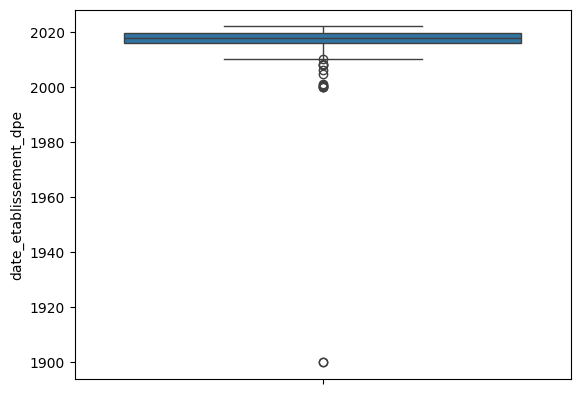

In [359]:
sns.boxplot(df1['date_etablissement_dpe'])

In [360]:
df1['date_etablissement_dpe'].describe()

count                           515537
mean     2017-09-19 12:36:31.519910656
min                1899-12-30 00:00:00
25%                2015-10-21 00:00:00
50%                2017-10-24 00:00:00
75%                2019-09-11 00:00:00
max                2021-12-21 00:00:00
Name: date_etablissement_dpe, dtype: object

In [361]:
Q1=df1['date_etablissement_dpe'].quantile(0.25)
Q3=df1['date_etablissement_dpe'].quantile(0.75)
IQR=Q3-Q1
filter=(df1['date_etablissement_dpe']>=(Q1-1.5*IQR))&(df1['date_etablissement_dpe']<=(Q3+1.5*IQR))
df1=df1[filter]

<Axes: ylabel='date_etablissement_dpe'>

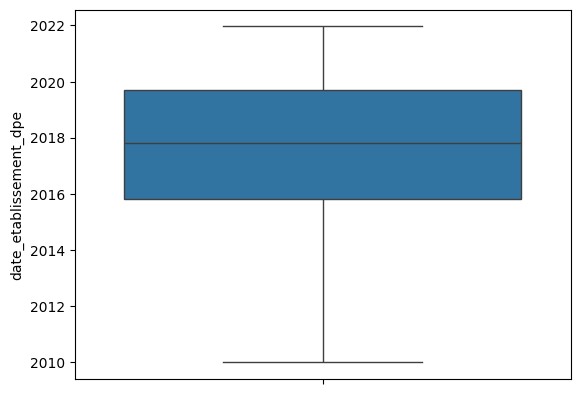

In [362]:
sns.boxplot(df1['date_etablissement_dpe'])

<Axes: ylabel='date_visite_diagnostiqueur'>

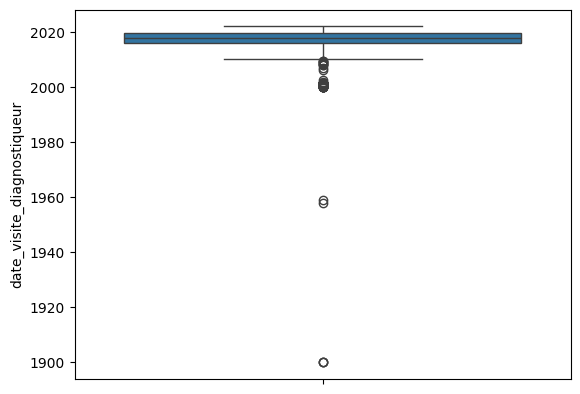

In [363]:
sns.boxplot(df1['date_visite_diagnostiqueur'])

In [364]:
Q1=df1['date_visite_diagnostiqueur'].quantile(0.25)
Q3=df1['date_visite_diagnostiqueur'].quantile(0.75)
IQR=Q3-Q1
filter=(df1['date_visite_diagnostiqueur']>=(Q1-1.5*IQR))&(df1['date_visite_diagnostiqueur']<=(Q3+1.5*IQR))
df1=df1[filter]

<Axes: ylabel='date_visite_diagnostiqueur'>

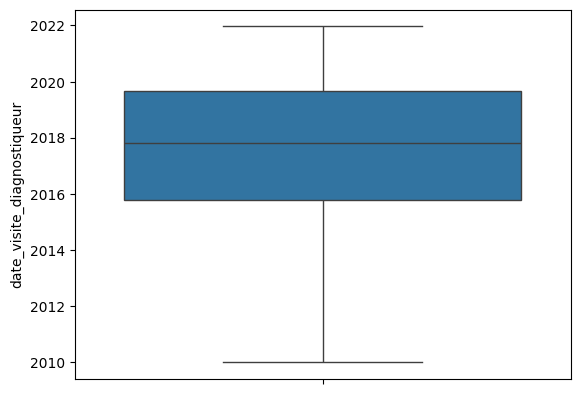

In [365]:
sns.boxplot(df1['date_visite_diagnostiqueur'])

<Axes: ylabel='date_arrete_tarifs_energies'>

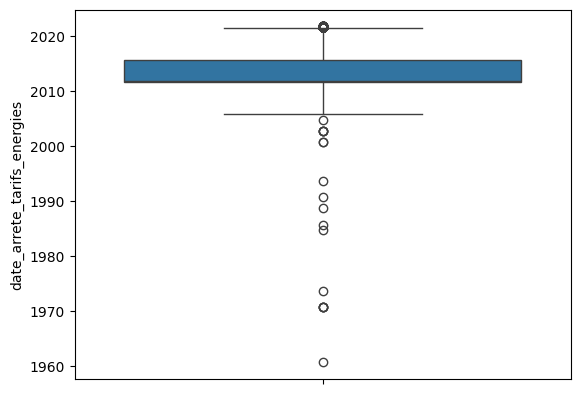

In [366]:
sns.boxplot(df1['date_arrete_tarifs_energies'])

In [367]:
Q1=df1['date_arrete_tarifs_energies'].quantile(0.25)
Q3=df1['date_arrete_tarifs_energies'].quantile(0.75)
IQR=Q3-Q1
filter=(df1['date_arrete_tarifs_energies']>=(Q1-1.5*IQR))&(df1['date_arrete_tarifs_energies']<=(Q3+1.5*IQR))
df1=df1[filter]

<Axes: ylabel='date_arrete_tarifs_energies'>

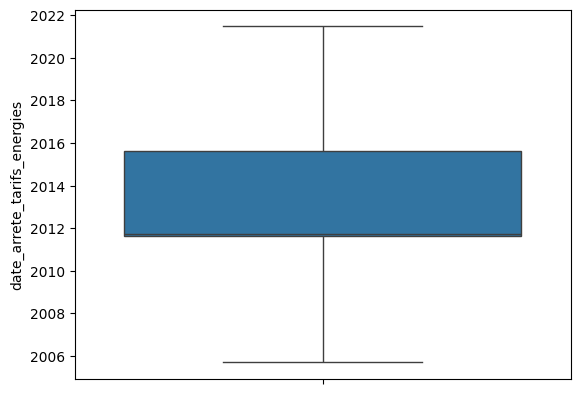

In [368]:
sns.boxplot(df1['date_arrete_tarifs_energies'])

In [369]:
len(df1)

514422

In [370]:
df1['estimation_ges'].describe()

count    5.144220e+05
mean     3.845908e+01
std      9.632605e+03
min     -2.924000e+01
25%      0.000000e+00
50%      2.490000e+00
75%      1.501000e+01
max      4.766768e+06
Name: estimation_ges, dtype: float64

<Axes: ylabel='estimation_ges'>

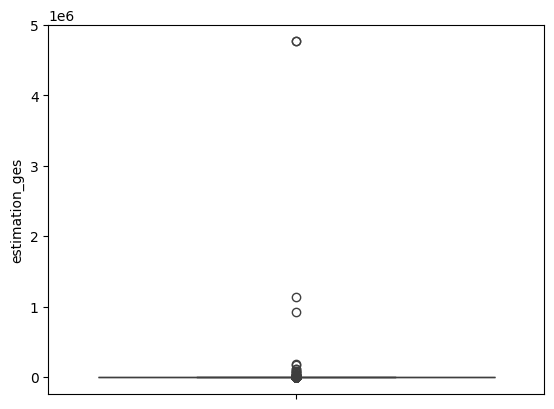

In [371]:
sns.boxplot(df1['estimation_ges'])

In [372]:
Q1=df1['estimation_ges'].quantile(0.25)
Q3=df1['estimation_ges'].quantile(0.75)
IQR=Q3-Q1
filter=(df1['estimation_ges']>=(Q1-1.5*IQR))&(df1['estimation_ges']<=(Q3+1.5*IQR))
df1=df1[filter]

<Axes: ylabel='estimation_ges'>

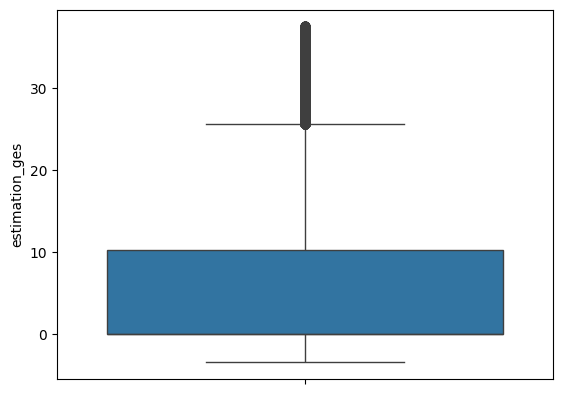

In [373]:
sns.boxplot(df1['estimation_ges'])

In [374]:
#les colonnes numeriques
numerical_columns=df1.select_dtypes(include=['number']).columns

In [375]:
df1.sort_values(by='date_visite_diagnostiqueur')

,id,numero_dpe,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,nom_methode_dpe,version_methode_dpe,nom_methode_etude_thermique,version_methode_etude_thermique,date_visite_diagnostiqueur,...,tv017_zone_hiver_code,tv017_zone_hiver_t_ext_moyen,tv017_zone_hiver_peta_cw,tv017_zone_hiver_dh14,tv017_zone_hiver_prs1,tv018_zone_ete_code,tv018_zone_ete_sclim_inf_150,tv018_zone_ete_sclim_sup_150,tv018_zone_ete_rclim_autres_etages,tv018_zone_ete_rclim_dernier_etage
55274,1191469,0973V8000002N,9480,3,8,Méthode Facture,NaN,\N,\N,2009-12-22,...,H1,6.58,10.5,42030,3.6,Ec,4,6,3.0,4
54171,1170896,0973V8000001M,9480,3,8,Méthode Facture,NaN,\N,\N,2009-12-22,...,H1,6.58,10.5,42030,3.6,Ec,4,6,3.0,4
180313,3705358,0941V3000001C,6607,10,3,FACTURE - DPE,V2012,\N,\N,2009-12-28,...,H2,8.08,12.0,33300,3.4,Eb,3,5,2.0,3
410589,9140944,2026V7000001C,17707,13,7,DPE VIERGE,V2012,\N,\N,2010-01-07,...,H2,8.08,12.0,33300,3.4,Ed,5,7,4.0,5
477961,10838058,1035V3000001X,1245,13,3,DPE VIERGE,V2012,\N,\N,2010-01-29,...,H2,8.08,12.0,33300,3.4,Ea,2,4,1.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485941,11035519,2113V4000086J,16594,10,4,FACTURE - DPE,V2012,\N,\N,2021-08-16,...,H3,9.65,14.5,22200,2.9,Ed,5,7,4.0,5
484202,10991011,2140N2000005Q,21413,10,12,FACTURE - DPE,V2012,Th-BCE 2012,7502,2021-10-27,...,H2,8.08,12.0,33300,3.4,Ec,4,6,3.0,4
481589,10928557,2154N2000019A,18560,10,12,FACTURE - DPE,V2012,Th-BCE 2012,7400,2021-12-11,...,H1,6.58,10.5,42030,3.6,Eb,3,5,2.0,3
482040,10939956,2154V2000875S,13279,11,2,3CL - DPE,V1.3,\N,\N,2021-12-17,...,H1,6.58,10.5,42030,3.6,Eb,3,5,2.0,3


In [376]:
df1['usr_diagnostiqueur_id'].nunique()

11384

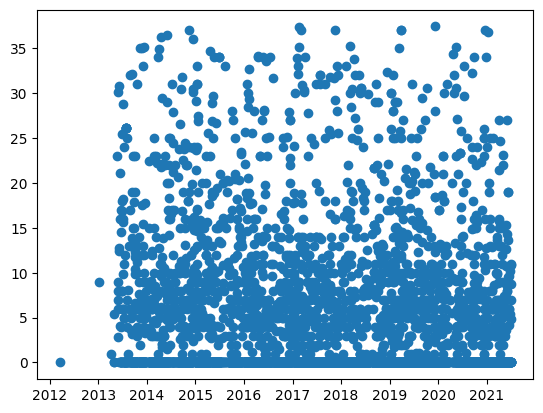

In [377]:
l=df1['tv016_departement_departement'].unique()
filter=(df1['tv016_departement_departement']==l[0])
plt.plot(df1[filter]['date_visite_diagnostiqueur'],df1[filter]['estimation_ges'],'o')

In [378]:
df1['tr002_type_batiment_id'].unique()

array([4, 5], dtype=int64)

In [379]:
df1['tr012_categorie_erp_id'].unique()

array(['\\N', '5', '4', '1', '3', '2'], dtype=object)

In [380]:
df1['tr013_type_erp_type'].unique()

array([nan, 'M\xa0: Magasins de vente, centres commerciaux',
       'W\xa0: Administrations, banques, bureaux', 'GHA\xa0: Habitation',
       'N\xa0: Restaurants et débits de boisson',
       'O\xa0: Hôtels et pensions de famille', 'GHW\xa0: Bureaux',
       'U\xa0: Établissements de soins',
       'J\xa0: Structures d’accueil pour personnes âgées ou personnes handicapées',
       'R\xa0: Établissements d’éveil, d’enseignement, de formation, centres de vacances, centres de loisirs sans hébergement',
       "T\xa0: Salles d'exposition à vocation commerciale",
       'P\xa0: Salles de danse et salles de jeux', 'GHZ\xa0: Usage mixte',
       'PS\xa0: Parcs de Stationnement couverts',
       "L\xa0: Salles d'auditions, de conférences, de réunions, de spectacles ou à usage multiple",
       "GHS\xa0: Dépôt d'archives",
       'S\xa0: Bibliothèques, centres de documentation',
       "OA\xa0: Hôtels-restaurants d'Altitude", 'GHR\xa0: Enseignement',
       'PA\xa0: Établissements de Plein Air'

In [381]:
def modify(ch):
    # Si ch est une chaîne de caractères, on effectue le split
    if isinstance(ch, str):
        return ch.split("\xa0")[0]+' '+ch.split("\xa0")[1]
    else:
        # Si ce n'est pas une chaîne, on retourne la valeur telle quelle
        return ch
df1['tr013_type_erp_type']=df1['tr013_type_erp_type'].apply(modify)


In [382]:
df1['tr013_type_erp_type'].unique()

array([nan, 'M : Magasins de vente, centres commerciaux',
       'W : Administrations, banques, bureaux', 'GHA : Habitation',
       'N : Restaurants et débits de boisson',
       'O : Hôtels et pensions de famille', 'GHW : Bureaux',
       'U : Établissements de soins',
       'J : Structures d’accueil pour personnes âgées ou personnes handicapées',
       'R : Établissements d’éveil, d’enseignement, de formation, centres de vacances, centres de loisirs sans hébergement',
       "T : Salles d'exposition à vocation commerciale",
       'P : Salles de danse et salles de jeux', 'GHZ : Usage mixte',
       'PS : Parcs de Stationnement couverts',
       "L : Salles d'auditions, de conférences, de réunions, de spectacles ou à usage multiple",
       "GHS : Dépôt d'archives",
       'S : Bibliothèques, centres de documentation',
       "OA : Hôtels-restaurants d'Altitude", 'GHR : Enseignement',
       'PA : Établissements de Plein Air', 'GHU : Usage sanitaire',
       'GHO : Hôtel', 'V : Éta

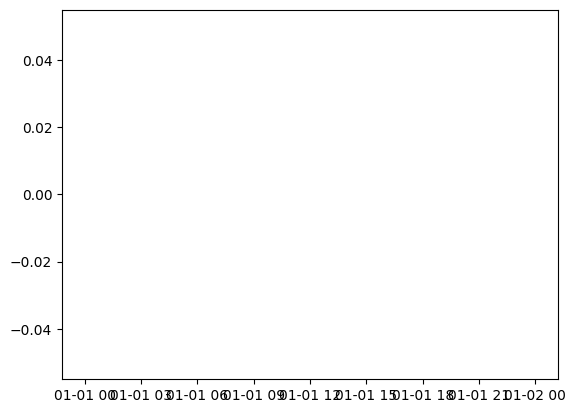

In [383]:
filtre=df1['tr013_type_erp_type']=='M'
plt.plot(df1[filtre]['date_visite_diagnostiqueur'],df1[filtre]['estimation_ges'],'o')

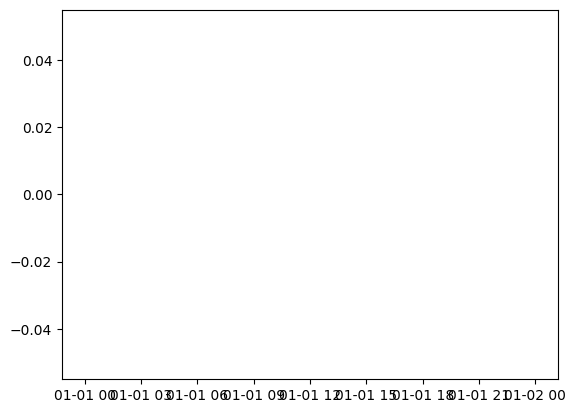

In [384]:
filter2=df1[filtre]['tr001_modele_dpe_id']==4
plt.plot(df1[filtre][filter2]['date_visite_diagnostiqueur'],df1[filtre][filter2]['estimation_ges'],'o')

C:\Users\marie\AppData\Local\Temp\ipykernel_20688\1334175104.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[filter1&filter2]
C:\Users\marie\AppData\Local\Temp\ipykernel_20688\1334175104.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(df1[filter1&filter2&filter3]['date_visite_diagnostiqueur'],df1[filter1&filter2&filter3]['estimation_ges'],'o')
C:\Users\marie\AppData\Local\Temp\ipykernel_20688\1334175104.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(df1[filter1&filter2&filter3]['date_visite_diagnostiqueur'],df1[filter1&filter2&filter3]['estimation_ges'],'o')


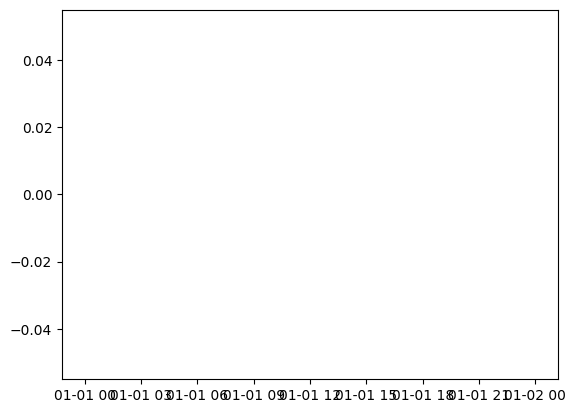

In [385]:
df1[filter1&filter2]
filter3=df1['usr_logiciel_id']==2
plt.plot(df1[filter1&filter2&filter3]['date_visite_diagnostiqueur'],df1[filter1&filter2&filter3]['estimation_ges'],'o')

In [386]:
l=np.array(df1['secteur_activite'])

In [ ]:
df_names=pd.read_excel('mapping_secteur_activite.xlsx')

In [388]:
df_names.iloc[0]['asset_type_cre']

"Bâtiment à usage principale de bureau, d'administration ou d'enseignement"

In [ ]:
df1 = df1.merge(df_names[['secteur_activite', 'asset_type_cre']], 
                on='secteur_activite', how='left')

# Remplacer uniquement les valeurs non nulles et conserver les autres
df1['secteur_activite'] = df1['asset_type_cre'].fillna(df1['secteur_activite'])

# Supprimer la colonne intermédiaire
df1.drop(columns=['asset_type_cre'], inplace=True)



In [390]:
df1['secteur_activite'].unique()

array(['Autres (théâtres, salles de sport, restaurati',
       "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
       'Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)',
       ..., 'Evenementiel: Salle de réception', 'Billard',
       'bureaux et atalier'], dtype=object)

In [391]:
df1['secteur_activite'].isna().sum()

41577

In [392]:
missing_values['secteur_activite']

47197